In [384]:
import pandas as pd
import numpy as np
import urllib3
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
from random import randint
from sklearn import datasets
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from geopy.geocoders import Nominatim
from collections import OrderedDict
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
import matplotlib.pyplot as plt
%matplotlib inline

# Data Initialization

In [2]:
dataset = pd.read_csv("properties_2016.csv",low_memory=False)

In [366]:
dataset.head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,CityRank
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN,13810.0
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN,13810.0
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN,12981.0
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN,15234.0
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN,15234.0
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN,15234.0
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN,15234.0
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN,49513.0
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN,49513.0
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,NaN,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN,NaN,15123.0


### We can observe that the dataset contains lots of Nans

In [4]:
dataset.count()

parcelid                        2985217
airconditioningtypeid            811519
architecturalstyletypeid           6061
basementsqft                       1628
bathroomcnt                     2973755
bedroomcnt                      2973767
buildingclasstypeid               12629
buildingqualitytypeid           1938488
calculatedbathnbr               2856305
decktypeid                        17096
finishedfloor1squarefeet         202717
calculatedfinishedsquarefeet    2929652
finishedsquarefeet12            2709184
finishedsquarefeet13               7672
finishedsquarefeet15             190798
finishedsquarefeet50             202717
finishedsquarefeet6               22001
fips                            2973780
fireplacecnt                     312637
fullbathcnt                     2856305
garagecarcnt                     883267
garagetotalsqft                  883267
hashottuborspa                    69014
heatingorsystemtypeid           1806401
latitude                        2973780


In [5]:
dataset.latitude.fillna(0,inplace=True)
dataset.longitude.fillna(0,inplace=True)

In [6]:
dataset.longitude.count()

2985217

In [7]:
print(dataset.longitude[1307],dataset.latitude[1307])

-118619325.0 34188739.0


# Getting Property Location using GeoCode Api

We tried to fetch locations of properties using python geocode api, but it is slow and takes a lot of time. So it is not possible to fetch locations for 3 million properties.

## So eventually we didn't use this method.

In [ ]:
geolocator = Nominatim()
converter = 1000000
count = 10
townList = ["" for i in range(count)]
cityList = ["" for i in range(count)]
countyList = ["" for i in range(count)]
stateList = ["" for i in range(count)]
zipcodeList = ["" for i in range(count)]
countryList = ["" for i in range(count)]
i = 0
while i < count:
    try:
        if dataset.latitude[i] != 0 and dataset.longitude[i] != 0:
            loc = str(dataset.latitude[i]/converter) + "," + str(dataset.longitude[i]/converter)
            location = geolocator.reverse(loc)
            locList = str(location).split(", ")
            try:
                countryList[i] = locList[-1]
                zipcodeList[i] = locList[-2]
                stateList[i] = locList[-3]
                countyList[i] = locList[-4]
                cityList[i] = locList[-5]
                townList[i] = locList[-6]
            except:
                pass
    except:
        print("Exception for ith row: "+ str(i))
        i+=1

In [ ]:
geolocator = Nominatim()
loc = str(dataset.latitude[0]/1000000) + "," + str(dataset.longitude[0]/1000000)
location = geolocator.reverse(loc)
location.address

In [ ]:
se1 = pd.Series(townList)
se2 = pd.Series(cityList)
se3 = pd.Series(countyList)
se4 = pd.Series(stateList)
se5 = pd.Series(zipcodeList)
se6 = pd.Series(countryList)
dtAddress = pd.DataFrame( OrderedDict( (('Town', se1), ('City', se2), ('County', se3),('State', se4),\
                                        ('ZipCode', se5),('Country', se6)) ) )

In [ ]:
dtAddress.head(5)

# Website Scraping to get City Ranks in USA

We scraped Niche.com to get the rank of cities in which the properties are located.

In [48]:
bestPlaces = list()
for page in range(1,1988):
    if(page == 1):
        url = 'https://www.niche.com/places-to-live/search/best-places-to-buy-a-house/'
    else:
        url = 'https://www.niche.com/places-to-live/search/best-places-to-buy-a-house/?page='+str(page)
    http = urllib3.PoolManager()
    response = http.request('GET', url)

    soup = BeautifulSoup(response.data,"html.parser")

    letters = soup.find_all("h2", class_="search-result-entity-name")

    for element in letters:
        strelement = str(element)
        cityName = strelement.split(">")[1].split("<")[0]
        bestPlaces.append(cityName)

In [49]:
seriesBestPlaces = pd.Series(bestPlaces)
dtBestPlaces = pd.DataFrame(seriesBestPlaces)
dtBestPlaces.head(10)

,0
0,Easton Park
1,Geist
2,Houserville
3,Grand Hampton
4,Bradford Woods
5,East Grand Rapids
6,North Central
7,Glendale
8,Fishers
9,Lemont


In [26]:
dtBestPlaces.to_csv("BestCities.csv")

# Data Cleaning

In [15]:
dfBestPlaces = pd.read_csv("BestCities.csv",low_memory=False)

### Map of cities along with their rank

In [16]:
CityDict = {3491: 'Avalon',
 3980: 'Carpinteria',
 4406: 'Downey',
 5465: 'La Mirada',
 5534: 'Lancaster',
 6021: 'Monterey Park',
 6285: 'Oceanside',
 6395: 'Paramount',
 6822: 'Rolling Hills',
 8384: 'Fountain Valley',
 9840: 'Agoura Hills',
 10241: 'Baldwin Park',
 10389: 'Beverly Hills',
 10608: 'Buena Park',
 10723: 'Carson',
 10734: 'Castaic',
 10774: 'Cerritos',
 10815: 'Chino Hills',
 11626: 'Glendora',
 12292: 'Lakewood',
 12447: 'Los Angeles',
 12520: 'Malibu',
 12773: 'Mission Viejo',
 13091: 'Ojai',
 13150: 'Oxnard',
 13232: 'Pearblossom',
 13311: 'Piru',
 13693: 'San Clemente',
 13716: 'Santa Fe Springs',
 14111: 'Temple City',
 14542: 'West Covina',
 14634: 'Whittier',
 14906: 'Bradbury',
 15237: 'La Palma',
 15554: 'Rancho Santa Margarita',
 16389: 'Silverado',
 16677: 'Acton',
 16764: 'Anaheim',
 16961: 'Bell Gardens',
 17150: 'Brea',
 17597: 'Coto de Caza',
 17686: 'Dana Point',
 17882: 'East Los Angeles',
 18098: 'Fillmore',
 18874: 'La Habra',
 18875: 'La Habra Heights',
 19177: 'Manhattan Beach',
 19202: 'Maricopa',
 20008: 'Pomona',
 21395: 'Wrightwood',
 21412: 'Yorba Linda',
 21778: 'Hawaiian Gardens',
 22827: 'Rowland Heights',
 24174: 'Compton',
 24245: 'Covina',
 24384: 'Diamond Bar',
 24435: 'Duarte',
 24797: 'Frazier Park',
 24812: 'Fullerton',
 24832: 'Garden Grove',
 25218: 'Huntington Beach',
 25271: 'Irwindale',
 25458: 'Laguna Hills',
 25459: 'Laguna Niguel',
 25468: 'Lake Hughes',
 25535: 'Lebec',
 25621: 'Llano',
 25953: 'Montebello',
 25974: 'Moorpark',
 26483: 'Pico Rivera',
 26531: 'Placentia',
 26964: 'Santa Monica',
 26965: 'Santa Paula',
 27103: 'Signal Hill',
 27110: 'Simi Valley',
 27183: 'South Pasadena',
 27491: 'Tustin',
 27512: 'Upland',
 29189: 'Littlerock',
 29712: 'Hermosa Beach',
 30187: 'Altadena',
 30267: 'Artesia',
 30399: 'Bell',
 30908: 'Claremont',
 31134: 'Cudahy',
 32380: 'Lake Forest',
 32616: 'Lynwood',
 32753: 'Maywood',
 32923: 'Monrovia',
 32927: 'Montclair',
 33252: 'Orange',
 33311: 'Palos Verdes Estates',
 33312: 'Palos Verdes Peninsula',
 33612: 'Redondo Beach',
 33727: 'Rolling Hills Estates',
 33836: 'San Dimas',
 33837: 'San Gabriel',
 33840: 'San Juan Capistrano',
 34037: 'Somis',
 34278: 'Thousand Oaks',
 34543: 'Ventura',
 34636: 'Walnut',
 34780: 'Westminster',
 36078: 'Pinon Hills',
 36502: 'South El Monte',
 37015: 'Azusa',
 37086: 'Aliso Viejo',
 37688: 'Calabasas',
 37882: 'City of Industry',
 38032: 'Costa Mesa',
 38980: 'Hidden Hills',
 39076: 'Huntington Park',
 39306: 'La Puente',
 39308: 'La Verne',
 40009: 'Newport Coast',
 40081: 'North Tustin',
 40110: 'Oak View',
 40227: 'Palmdale',
 40633: 'Rosamond',
 41484: 'Vernon',
 41673: 'Westlake Village',
 42091: 'Bell Canyon',
 42150: 'Hawthorne',
 42967: 'Stanton',
 44116: 'Bellflower',
 44833: 'Cypress',
 45398: 'Gardena',
 45457: 'Glendale',
 45602: 'Hacienda Heights',
 45888: 'Inglewood',
 46080: 'La Canada Flintridge',
 46098: 'Laguna Woods',
 46178: 'Lawndale',
 46298: 'Long Beach',
 46314: 'Los Alamitos',
 47019: 'Pasadena',
 47198: 'Port Hueneme',
 47547: 'San Fernando',
 47568: 'Santa Ana',
 47695: 'Sierra Madre',
 47762: 'South Gate',
 47913: 'South Gate',
 48211: 'Valyermo',
 48424: 'West Hollywood',
 50677: 'Alhambra',
 50749: 'Arcadia',
 51239: 'Camarillo',
 51617: 'Culver City',
 51861: 'El Monte',
 52650: 'Irvine',
 52835: 'Ladera Ranch',
 52842: 'Laguna Beach',
 53027: 'Lomita',
 53162: 'Marina del Rey',
 53571: 'Newport Beach',
 53636: 'Norwalk',
 53655: 'Oak Park',
 54053: 'Rancho Palos Verdes',
 54212: 'Rosemead',
 54299: 'San Marino',
 54311: 'Santa Clarita',
 54352: 'Seal Beach',
 54722: 'Torrance',
 54970: 'Villa Park',
 55753: 'El Segundo',
 56780: 'Topanga',
 113412: 'Alondra Park',
 113576: 'Avocado Heights',
 114828: 'East La Mirada',
 114834: 'East Pasadena',
 116042: 'Ladera Heights',
 118217: 'South San Jose Hills',
 118225: 'South Whittier',
 118694: 'Valinda',
 118875: 'West Athens',
 118878: 'West Carson',
 118880: 'West Compton',
 118895: 'West Puente Valley',
 118914: 'Westmont',
 118994: 'Willowbrook',
 272578: 'Commerce',
 396053: 'Florence-Graham',
 396054: 'Burbank',
 396550: 'View Park-Windsor Hills',
 396551: 'La Crescenta-Montrose',
 396556: 'West Whittier-Los Nietos'}

In [50]:
for key in CityDict.keys():
    dataset['regionidcity'].replace(key,CityDict.get(key),inplace=True)

In [51]:
dataset['regionidcity'].head(10)

0       Calabasas
1       Calabasas
2     Culver City
3     Los Angeles
4     Los Angeles
5     Los Angeles
6     Los Angeles
7         Burbank
8         Burbank
9    San Fernando
Name: regionidcity, dtype: object

In [52]:
dfBestPlaces.head(10)

,Unnamed: 0,0
0,0,Easton Park
1,1,Geist
2,2,Houserville
3,3,Grand Hampton
4,4,Bradford Woods
5,5,East Grand Rapids
6,6,North Central
7,7,Glendale
8,8,Fishers
9,9,Lemont


In [53]:
smallCityList = CityDict.values()
cityrankmap = dict()
for i in range(len(bestPlaces)):
    if bestPlaces[i] in smallCityList:
        cityrankmap[bestPlaces[i]]=i+1   

In [54]:
ranklist = list()
for item in dataset.regionidcity:
    ranklist.append(cityrankmap.get(item))
rankSeries = pd.Series(ranklist)
dataset["CityRank"] = rankSeries
dataset[['regionidcity','CityRank']].head(10)

,regionidcity,CityRank
0,Calabasas,13810.0
1,Calabasas,13810.0
2,Culver City,12981.0
3,Los Angeles,15234.0
4,Los Angeles,15234.0
5,Los Angeles,15234.0
6,Los Angeles,15234.0
7,Burbank,49513.0
8,Burbank,49513.0
9,San Fernando,15123.0


In [55]:
retainList = ['parcelid','buildingqualitytypeid','heatingorsystemtypeid','propertylandusetypeid','propertycountylandusecode',\
            'regionidcity','regionidzip','bathroomcnt','bedroomcnt','roomcnt','calculatedfinishedsquarefeet',\
             'garagetotalsqft','lotsizesquarefeet','poolcnt','unitcnt','yearbuilt','taxvaluedollarcnt','CityRank']
dfFilter = dataset.filter(retainList)

In [56]:
dfFilter.columns

Index(['parcelid', 'buildingqualitytypeid', 'heatingorsystemtypeid',
       'propertylandusetypeid', 'propertycountylandusecode', 'regionidcity',
       'regionidzip', 'bathroomcnt', 'bedroomcnt', 'roomcnt',
       'calculatedfinishedsquarefeet', 'garagetotalsqft', 'lotsizesquarefeet',
       'poolcnt', 'unitcnt', 'yearbuilt', 'taxvaluedollarcnt', 'CityRank'],
      dtype='object')

In [57]:
dfFilter['roomcnt'] = np.where(dfFilter['bathroomcnt'] + dfFilter['bedroomcnt']>dfFilter['roomcnt'],\
                                     dfFilter['bathroomcnt'] + dfFilter['bedroomcnt'],dfFilter['roomcnt'])

In [58]:
dfFilter.drop(['bathroomcnt','bedroomcnt'],inplace=True,axis=1)

In [59]:
dfFilter.columns

Index(['parcelid', 'buildingqualitytypeid', 'heatingorsystemtypeid',
       'propertylandusetypeid', 'propertycountylandusecode', 'regionidcity',
       'regionidzip', 'roomcnt', 'calculatedfinishedsquarefeet',
       'garagetotalsqft', 'lotsizesquarefeet', 'poolcnt', 'unitcnt',
       'yearbuilt', 'taxvaluedollarcnt', 'CityRank'],
      dtype='object')

In [60]:
dfFilter['yearbuilt'].count()

2925289

### Replacing roomcnt Nan with 0

In [62]:
dfFilter['roomcnt'].fillna(0,inplace=True)

### Replacing calculatedfinishedsquarefeet Nan with average area per room * roomcnt

In [64]:
dfFilter['area_per_room'] = dfFilter['calculatedfinishedsquarefeet'] / dfFilter['roomcnt']
dfFilter.area_per_room[np.isinf(dfFilter.area_per_room)] = dfFilter.calculatedfinishedsquarefeet
mean_area_per_room = dfFilter.area_per_room.mean()
dfFilter.calculatedfinishedsquarefeet = dfFilter.calculatedfinishedsquarefeet.fillna(mean_area_per_room*dfFilter.roomcnt)

/Users/jatingarg/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Replacing garagetotalsqft with mean

In [66]:
dfFilter.garagetotalsqft.fillna(dfFilter.garagetotalsqft.mean(),inplace=True)

### Replacing lotsizesquarefeet Nan with calculatedfinishedsquarefeet

In [68]:
dfFilter.lotsizesquarefeet.fillna(dfFilter.calculatedfinishedsquarefeet.mean(),inplace=True)

### Replacing poolcnt Nan with 0

In [70]:
dfFilter.poolcnt.fillna(0,inplace=True)

### Replacing unitcnt Nan with 1

In [72]:
dfFilter.unitcnt.fillna(1,inplace=True)

### Replacing yearbuilt Nan with mean

In [74]:
dfFilter.yearbuilt.fillna(int(dfFilter.yearbuilt.mean()),inplace=True)

### Replacing taxvaluedollarcnt Nan with 

In [76]:
dfFilter.taxvaluedollarcnt.fillna(dfFilter.taxvaluedollarcnt.mean(),inplace=True)

In [77]:
categories = list()
categories.append('buildingqualitytypeid')
categories.append('heatingorsystemtypeid')
categories.append('propertylandusetypeid')
for category in categories:
    cat_count=dfFilter[category].value_counts().to_dict()
    sorted(cat_count, key=cat_count.get)
    count=0
    for key in cat_count.keys():
        count+=1
        s=""+category
        s = s+"_"+str(int(key))
        dfFilter[s] = dfFilter[category] == key
        if(count==4):
            break

In [78]:
dfFilter.head(10)

,parcelid,buildingqualitytypeid,heatingorsystemtypeid,propertylandusetypeid,propertycountylandusecode,regionidcity,regionidzip,roomcnt,calculatedfinishedsquarefeet,garagetotalsqft,...,buildingqualitytypeid_1,buildingqualitytypeid_10,heatingorsystemtypeid_2,heatingorsystemtypeid_7,heatingorsystemtypeid_6,heatingorsystemtypeid_24,propertylandusetypeid_261,propertylandusetypeid_266,propertylandusetypeid_246,propertylandusetypeid_269
0,10754147,NaN,NaN,269.0,010D,Calabasas,96337.0,0.0,0.0,383.769357,...,False,False,False,False,False,False,False,False,False,True
1,10759547,NaN,NaN,261.0,0109,Calabasas,96337.0,0.0,0.0,383.769357,...,False,False,False,False,False,False,True,False,False,False
2,10843547,NaN,NaN,47.0,1200,Culver City,96095.0,0.0,73026.0,383.769357,...,False,False,False,False,False,False,False,False,False,False
3,10859147,7.0,NaN,47.0,1200,Los Angeles,96424.0,0.0,5068.0,383.769357,...,False,False,False,False,False,False,False,False,False,False
4,10879947,NaN,NaN,31.0,1210,Los Angeles,96450.0,0.0,1776.0,383.769357,...,False,False,False,False,False,False,False,False,False,False
5,10898347,7.0,NaN,31.0,1210,Los Angeles,96446.0,0.0,2400.0,383.769357,...,False,False,False,False,False,False,False,False,False,False
6,10933547,NaN,NaN,260.0,010V,Los Angeles,96049.0,0.0,0.0,383.769357,...,False,False,False,False,False,False,False,False,False,False
7,10940747,NaN,NaN,31.0,1210,Burbank,96434.0,0.0,3611.0,383.769357,...,False,False,False,False,False,False,False,False,False,False
8,10954547,NaN,NaN,269.0,010D,Burbank,96436.0,0.0,0.0,383.769357,...,False,False,False,False,False,False,False,False,False,True
9,10976347,7.0,NaN,31.0,1210,San Fernando,96366.0,0.0,3754.0,383.769357,...,False,False,False,False,False,False,False,False,False,False


### Now we are dropping categorical data as we have made new columns from them

In [80]:
dropList = ['buildingqualitytypeid','heatingorsystemtypeid','propertylandusetypeid','propertycountylandusecode']
for item in dropList:
    del dfFilter[item]

In [81]:
dfFilter.columns

Index(['parcelid', 'regionidcity', 'regionidzip', 'roomcnt',
       'calculatedfinishedsquarefeet', 'garagetotalsqft', 'lotsizesquarefeet',
       'poolcnt', 'unitcnt', 'yearbuilt', 'taxvaluedollarcnt', 'CityRank',
       'area_per_room', 'buildingqualitytypeid_7', 'buildingqualitytypeid_4',
       'buildingqualitytypeid_1', 'buildingqualitytypeid_10',
       'heatingorsystemtypeid_2', 'heatingorsystemtypeid_7',
       'heatingorsystemtypeid_6', 'heatingorsystemtypeid_24',
       'propertylandusetypeid_261', 'propertylandusetypeid_266',
       'propertylandusetypeid_246', 'propertylandusetypeid_269'],
      dtype='object')

In [82]:
lst = ["roomcnt","calculatedfinishedsquarefeet","garagetotalsqft","lotsizesquarefeet","unitcnt",\
       "yearbuilt","taxvaluedollarcnt","CityRank"]
for col in lst:
    col_zscore = col + '_zscore'
    dfFilter[col_zscore] = (dfFilter[col] - dfFilter[col].min()) / (dfFilter[col].max() - dfFilter[col].min())

In [83]:
dfFilter.columns

Index(['parcelid', 'regionidcity', 'regionidzip', 'roomcnt',
       'calculatedfinishedsquarefeet', 'garagetotalsqft', 'lotsizesquarefeet',
       'poolcnt', 'unitcnt', 'yearbuilt', 'taxvaluedollarcnt', 'CityRank',
       'area_per_room', 'buildingqualitytypeid_7', 'buildingqualitytypeid_4',
       'buildingqualitytypeid_1', 'buildingqualitytypeid_10',
       'heatingorsystemtypeid_2', 'heatingorsystemtypeid_7',
       'heatingorsystemtypeid_6', 'heatingorsystemtypeid_24',
       'propertylandusetypeid_261', 'propertylandusetypeid_266',
       'propertylandusetypeid_246', 'propertylandusetypeid_269',
       'roomcnt_zscore', 'calculatedfinishedsquarefeet_zscore',
       'garagetotalsqft_zscore', 'lotsizesquarefeet_zscore', 'unitcnt_zscore',
       'yearbuilt_zscore', 'taxvaluedollarcnt_zscore', 'CityRank_zscore'],
      dtype='object')

In [84]:
lst = ['buildingqualitytypeid_7', 'buildingqualitytypeid_4',
       'buildingqualitytypeid_1', 'buildingqualitytypeid_10',
       'heatingorsystemtypeid_2', 'heatingorsystemtypeid_7',
       'heatingorsystemtypeid_6', 'heatingorsystemtypeid_24',
       'propertylandusetypeid_261', 'propertylandusetypeid_266',
       'propertylandusetypeid_246', 'propertylandusetypeid_269']
for col in lst:
    dfFilter[col] = dfFilter[col].astype(int)

In [85]:
for col in lst:
    dfFilter[col].fillna(0,inplace=True)

In [86]:
dfFilter['CityRank_zscore'].fillna(dfFilter.CityRank_zscore[0],inplace=True)
dfFilter['regionidcity'].fillna(dfFilter.regionidcity[0],inplace=True)
dfFilter['CityRank'].fillna(dfFilter.CityRank[0],inplace=True)
dfFilter['regionidzip'].fillna(dfFilter.regionidzip[0],inplace=True)
dfFilter.drop(['area_per_room'], axis=1,inplace=True)

In [87]:
dfFilter.to_csv("Cleaned_Data.csv",index=False)

In [88]:
dfFilter.count()

parcelid                               2985217
regionidcity                           2985217
regionidzip                            2985217
roomcnt                                2985217
calculatedfinishedsquarefeet           2985217
garagetotalsqft                        2985217
lotsizesquarefeet                      2985217
poolcnt                                2985217
unitcnt                                2985217
yearbuilt                              2985217
taxvaluedollarcnt                      2985217
CityRank                               2985217
buildingqualitytypeid_7                2985217
buildingqualitytypeid_4                2985217
buildingqualitytypeid_1                2985217
buildingqualitytypeid_10               2985217
heatingorsystemtypeid_2                2985217
heatingorsystemtypeid_7                2985217
heatingorsystemtypeid_6                2985217
heatingorsystemtypeid_24               2985217
propertylandusetypeid_261              2985217
propertylandu

## Cleaning Done !

In [90]:
dfFilter.head(10)

,parcelid,regionidcity,regionidzip,roomcnt,calculatedfinishedsquarefeet,garagetotalsqft,lotsizesquarefeet,poolcnt,unitcnt,yearbuilt,...,propertylandusetypeid_246,propertylandusetypeid_269,roomcnt_zscore,calculatedfinishedsquarefeet_zscore,garagetotalsqft_zscore,lotsizesquarefeet_zscore,unitcnt_zscore,yearbuilt_zscore,taxvaluedollarcnt_zscore,CityRank_zscore
0,10754147,Calabasas,96337.0,0.0,0.0,383.769357,85768.00000,0.0,1.0,1964.0,...,0,1,0.0,0.000000,0.049525,0.000261,0.000000,0.761682,2.828994e-08,0.198981
1,10759547,Calabasas,96337.0,0.0,0.0,383.769357,4083.00000,0.0,1.0,1964.0,...,0,0,0.0,0.000000,0.049525,0.000012,0.000000,0.761682,9.729973e-05,0.198981
2,10843547,Culver City,96095.0,0.0,73026.0,383.769357,63085.00000,0.0,2.0,1964.0,...,0,0,0.0,0.076662,0.049525,0.000192,0.001004,0.761682,4.998076e-03,0.180382
3,10859147,Los Angeles,96424.0,0.0,5068.0,383.769357,7521.00000,0.0,1.0,1948.0,...,0,0,0.0,0.005320,0.049525,0.000023,0.000000,0.686916,4.090843e-03,0.230930
4,10879947,Los Angeles,96450.0,0.0,1776.0,383.769357,8512.00000,0.0,1.0,1947.0,...,0,0,0.0,0.001864,0.049525,0.000026,0.000000,0.682243,1.532926e-03,0.230930
5,10898347,Los Angeles,96446.0,0.0,2400.0,383.769357,2500.00000,0.0,1.0,1943.0,...,0,0,0.0,0.002519,0.049525,0.000007,0.000000,0.663551,1.001867e-03,0.230930
6,10933547,Los Angeles,96049.0,0.0,0.0,383.769357,1793.33962,0.0,1.0,1964.0,...,0,0,0.0,0.000000,0.049525,0.000005,0.000000,0.761682,1.961101e-03,0.230930
7,10940747,Burbank,96434.0,0.0,3611.0,383.769357,5333.00000,0.0,1.0,1946.0,...,0,0,0.0,0.003791,0.049525,0.000016,0.000000,0.677570,2.434650e-03,1.000000
8,10954547,Burbank,96436.0,0.0,0.0,383.769357,145865.00000,0.0,1.0,1964.0,...,0,1,0.0,0.000000,0.049525,0.000444,0.000000,0.761682,2.828994e-08,1.000000
9,10976347,San Fernando,96366.0,0.0,3754.0,383.769357,7494.00000,0.0,1.0,1978.0,...,0,0,0.0,0.003941,0.049525,0.000023,0.000000,0.827103,9.236667e-04,0.228439


# Scoring Function For Properties

### We have assigned weights to different factors that we feel are important !

In [92]:
weights = [2.5, 1.5, 3, 4.5, 1,
           1, 0.5, 0.8, 0.2,
          10, 20, 10, 10, 35 ]
indexes = [7, 12, 13, 14, 15, 
           16, 17, 18, 19,
           24, 25, 26, 30, 31]

In [395]:
retainList = ['poolcnt','buildingqualitytypeid_7','buildingqualitytypeid_4','buildingqualitytypeid_1',\
      'buildingqualitytypeid_10','heatingorsystemtypeid_2','heatingorsystemtypeid_7','heatingorsystemtypeid_6',\
      'heatingorsystemtypeid_24','roomcnt_zscore','calculatedfinishedsquarefeet_zscore','garagetotalsqft_zscore',\
      'taxvaluedollarcnt_zscore','CityRank_zscore']
dfScore  = dfFilter.filter(retainList,axis=1)

In [396]:
dfScore['CityRank_zscore'] = 1 - dfScore['CityRank_zscore']

In [397]:
dfScore = dfScore.mul(weights, axis=1)
dfFilter['HouseScore'] =  dfScore[retainList].sum(axis=1)

### The 2 matrix shows the House Scores in ascending and descending order

In [398]:
dfFilter.sort_values('HouseScore', ascending=False).head(10)

,regionidcity,regionidzip,roomcnt,calculatedfinishedsquarefeet,garagetotalsqft,lotsizesquarefeet,poolcnt,unitcnt,yearbuilt,taxvaluedollarcnt,...,propertylandusetypeid_269,roomcnt_zscore,calculatedfinishedsquarefeet_zscore,garagetotalsqft_zscore,lotsizesquarefeet_zscore,unitcnt_zscore,yearbuilt_zscore,taxvaluedollarcnt_zscore,CityRank_zscore,HouseScore
1172703,Silverado,96986.0,16.0,952576.0,383.769357,43600.00000,0.0,1.0,1964.0,731571.0,...,0,0.166667,1.000000,0.049525,0.000133,0.000000,0.761682,0.002587,0.198981,50.223437
341893,Los Angeles,95991.0,0.0,520825.0,383.769357,1793.33962,0.0,464.0,2013.0,282786000.0,...,0,0.000000,0.546754,0.049525,0.000005,0.464859,0.990654,1.000000,0.230930,48.347795
1933353,Los Angeles,96026.0,0.0,522511.0,383.769357,1793.33962,1.0,401.0,2008.0,149613482.0,...,0,0.000000,0.548524,0.049525,0.000005,0.401606,0.967290,0.529070,0.230930,46.173890
2332232,San Clemente,96982.0,52.0,531118.0,383.769357,3865.00000,0.0,1.0,1972.0,249939.0,...,0,0.541667,0.557560,0.049525,0.000011,0.000000,0.799065,0.000884,0.199542,45.087969
148347,Los Angeles,95988.0,0.0,820242.0,383.769357,1793.33962,0.0,421.0,2009.0,12694925.0,...,0,0.000000,0.861078,0.049525,0.000005,0.421687,0.971963,0.044892,0.230930,45.083188
2449795,Seal Beach,96225.0,96.0,3050.0,0.000000,5612.00000,0.0,1.0,1977.0,1051974.0,...,0,1.000000,0.003202,0.000000,0.000017,0.000000,0.822430,0.003720,0.047810,44.227877
1425153,Newport Beach,96957.0,18.5,20327.0,5998.000000,63206.00000,1.0,1.0,1998.0,35305017.0,...,0,0.192708,0.021339,0.774035,0.000192,0.000000,0.920561,0.124847,0.142399,43.858729
1603574,Newport Beach,96978.0,15.5,17893.0,6298.000000,31945.00000,1.0,1.0,2008.0,15676543.0,...,0,0.161458,0.018784,0.812750,0.000097,0.000000,0.967290,0.055436,0.142399,43.188162
2423464,Westlake Village,96384.0,13.0,9754.0,7415.000000,188179.00000,1.0,1.0,2012.0,12241404.0,...,0,0.135417,0.010240,0.956898,0.000573,0.000000,0.985981,0.043289,0.175087,42.932759
1793507,Palos Verdes Estates,96121.0,15.0,6188.0,383.769357,15540.00000,1.0,1.0,1959.0,911392.0,...,0,0.156250,0.006496,0.049525,0.000047,0.000000,0.738318,0.003223,0.068339,42.828040


In [399]:
dfFilter.sort_values('HouseScore', ascending=True).head(10)

,regionidcity,regionidzip,roomcnt,calculatedfinishedsquarefeet,garagetotalsqft,lotsizesquarefeet,poolcnt,unitcnt,yearbuilt,taxvaluedollarcnt,...,propertylandusetypeid_269,roomcnt_zscore,calculatedfinishedsquarefeet_zscore,garagetotalsqft_zscore,lotsizesquarefeet_zscore,unitcnt_zscore,yearbuilt_zscore,taxvaluedollarcnt_zscore,CityRank_zscore,HouseScore
2067882,Moorpark,97097.0,0.0,1680.0,0.000000,12000.0,0.0,1.0,2003.0,114708.0,...,0,0.0,0.001764,0.000000,0.000036,0.0,0.943925,4.056318e-04,0.989164,0.418603
2363452,Moorpark,97118.0,0.0,1870.0,0.000000,126324.0,0.0,1.0,1984.0,383170.0,...,0,0.0,0.001963,0.000000,0.000385,0.0,0.855140,1.354979e-03,0.989164,0.432086
8,Burbank,96436.0,0.0,0.0,383.769357,145865.0,0.0,1.0,1964.0,9.0,...,1,0.0,0.000000,0.049525,0.000444,0.0,0.761682,2.828994e-08,1.000000,0.495250
1144994,Burbank,96436.0,0.0,0.0,383.769357,77718.0,0.0,1.0,1964.0,9.0,...,1,0.0,0.000000,0.049525,0.000236,0.0,0.761682,2.828994e-08,1.000000,0.495250
1279037,Burbank,96436.0,0.0,0.0,383.769357,114233.0,0.0,1.0,1964.0,9.0,...,1,0.0,0.000000,0.049525,0.000348,0.0,0.761682,2.828994e-08,1.000000,0.495250
267585,Burbank,96436.0,0.0,0.0,383.769357,5585.0,0.0,1.0,1964.0,9.0,...,1,0.0,0.000000,0.049525,0.000017,0.0,0.761682,2.828994e-08,1.000000,0.495250
14797,Burbank,96436.0,0.0,0.0,383.769357,79522.0,0.0,1.0,1964.0,9.0,...,1,0.0,0.000000,0.049525,0.000242,0.0,0.761682,2.828994e-08,1.000000,0.495250
728661,Burbank,96436.0,0.0,0.0,383.769357,45142.0,0.0,1.0,1964.0,9.0,...,1,0.0,0.000000,0.049525,0.000137,0.0,0.761682,2.828994e-08,1.000000,0.495250
252647,Burbank,96436.0,0.0,0.0,383.769357,88127.0,0.0,1.0,1964.0,9.0,...,1,0.0,0.000000,0.049525,0.000268,0.0,0.761682,2.828994e-08,1.000000,0.495250
2572214,Burbank,96436.0,0.0,0.0,383.769357,85319.0,0.0,1.0,1964.0,9.0,...,1,0.0,0.000000,0.049525,0.000260,0.0,0.761682,2.828994e-08,1.000000,0.495250


### For every feature lets draw a histogram and have a look at the distribution.

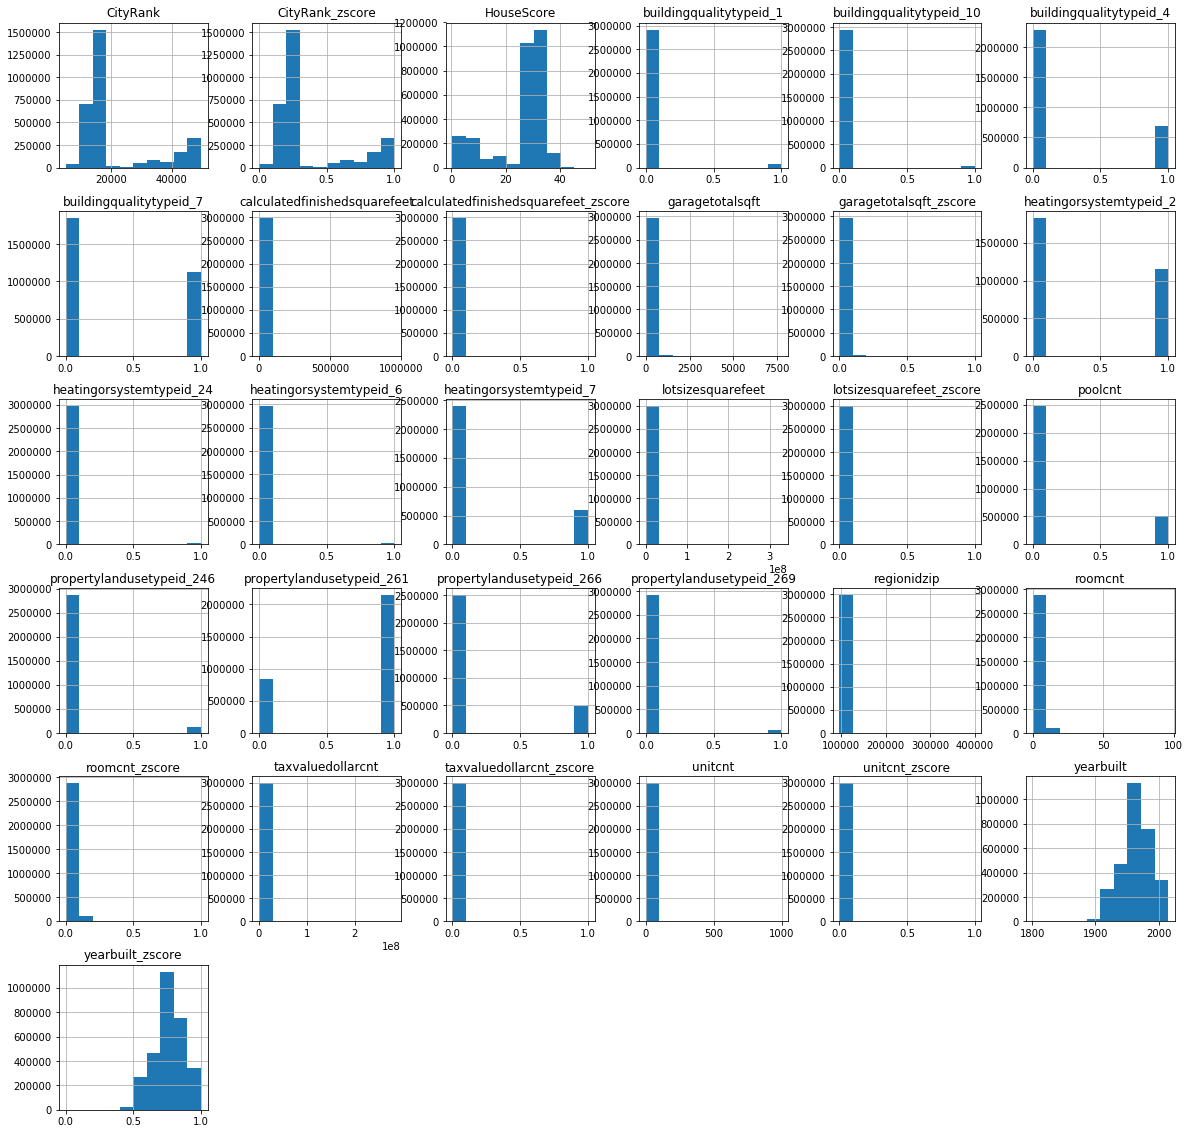

In [400]:
dfFilter.hist(figsize=(20,20))
plt.show()

In [401]:
dfFilter.columns

Index(['regionidcity', 'regionidzip', 'roomcnt',
       'calculatedfinishedsquarefeet', 'garagetotalsqft', 'lotsizesquarefeet',
       'poolcnt', 'unitcnt', 'yearbuilt', 'taxvaluedollarcnt', 'CityRank',
       'buildingqualitytypeid_7', 'buildingqualitytypeid_4',
       'buildingqualitytypeid_1', 'buildingqualitytypeid_10',
       'heatingorsystemtypeid_2', 'heatingorsystemtypeid_7',
       'heatingorsystemtypeid_6', 'heatingorsystemtypeid_24',
       'propertylandusetypeid_261', 'propertylandusetypeid_266',
       'propertylandusetypeid_246', 'propertylandusetypeid_269',
       'roomcnt_zscore', 'calculatedfinishedsquarefeet_zscore',
       'garagetotalsqft_zscore', 'lotsizesquarefeet_zscore', 'unitcnt_zscore',
       'yearbuilt_zscore', 'taxvaluedollarcnt_zscore', 'CityRank_zscore',
       'HouseScore'],
      dtype='object')

In [403]:
dfFilter['parcelid'] = dataset['parcelid']

In [385]:
dfFilter.to_csv("Filtered_Data_2016.csv",index=False)

# Distance Function for Properties

In [404]:
parcelidList = list(dfFilter[0:no_of_rows:3000]['parcelid'])

In [219]:
dfDist  = dfFilter.drop(['regionidcity','parcelid','regionidzip','calculatedfinishedsquarefeet',
       'garagetotalsqft', 'lotsizesquarefeet', 'unitcnt',
       'yearbuilt', 'taxvaluedollarcnt', 'CityRank'],axis=1)
no_of_rows,co_of_col = dfDist.shape
df1 = dfDist[0:no_of_rows:3000].copy()


In [222]:
dm = pdist(df1.values, lambda u, v: np.sqrt(abs((u-v).sum())))
dist_matrix = squareform(dm)

In [224]:
dfMinMax = pd.DataFrame(dist_matrix)

### The matrix shows the pairwise distance between the houses according to our ditance function

In [225]:
dfMinMax.head(10)

,0,1,2,3,4,5,6,7,8,9,...,986,987,988,989,990,991,992,993,994,995
0,0.000000,3.913718,3.754096,3.085652,1.110113,1.195608,3.655827,2.900881,3.150984,3.191653,...,3.052254,2.902725,2.648561,3.533560,3.026739,2.738396,0.991917,0.991917,0.991917,0.991917
1,3.913718,0.000000,5.423138,2.407476,4.068112,4.092269,1.397183,2.627180,2.321311,2.265069,...,2.449681,2.625143,2.881374,5.272878,4.947559,2.796136,4.037461,4.037461,4.037461,4.037461
2,3.754096,5.423138,0.000000,4.859474,3.586208,3.558617,5.240067,4.744297,4.901218,4.927463,...,4.838336,4.745424,4.594356,1.267749,2.220831,4.646724,3.620682,3.620682,3.620682,3.620682
3,3.085652,2.407476,4.859474,0.000000,3.279268,3.309188,1.960567,1.051728,0.638323,0.815723,...,0.452762,1.046630,1.583153,4.691193,4.322314,1.422124,3.241164,3.241164,3.241164,3.241164
4,1.110113,4.068112,3.586208,3.279268,0.000000,0.443991,3.820657,3.106037,3.340816,3.379201,...,3.247861,3.107758,2.871798,3.354653,2.815812,2.954854,0.498448,0.498448,0.498448,0.498448
5,1.195608,4.092269,3.558617,3.309188,0.443991,0.000000,3.846368,3.137609,3.370190,3.408244,...,3.278068,3.139314,2.905917,3.325142,2.780588,2.988024,0.667517,0.667517,0.667517,0.667517
6,3.655827,1.397183,5.240067,1.960567,3.820657,3.846368,0.000000,2.224849,1.853744,1.782812,...,2.012167,2.222444,2.519959,5.084399,4.746179,2.422036,3.788003,3.788003,3.788003,3.788003
7,2.900881,2.627180,4.744297,1.051728,3.106037,3.137609,2.224849,0.000000,1.230280,1.330991,...,0.949284,0.103429,1.183317,4.571779,4.192405,0.957237,3.065781,3.065781,3.065781,3.065781
8,3.150984,2.321311,4.901218,0.638323,3.340816,3.370190,1.853744,1.230280,0.000000,0.507886,...,0.782592,1.225925,1.706994,4.734422,4.369193,1.558811,3.303423,3.303423,3.303423,3.303423
9,3.191653,2.265069,4.927463,0.815723,3.379201,3.408244,1.782812,1.330991,0.507886,0.000000,...,0.932951,1.326966,1.780948,4.761586,4.398613,1.639463,3.342237,3.342237,3.342237,3.342237


In [259]:
temp = list()
for i in range(996):
    temp.append(np.nanmax(dfMinMax.iloc[:,i].values))

In [261]:
sorted(temp)
max = -9
index = 0
for i in range(len(temp)):
    if max<temp[i]:
        max = temp[i]
        index = i

In [307]:
dfDist  = dfFilter.drop(['regionidcity','parcelid','regionidzip','calculatedfinishedsquarefeet',
       'garagetotalsqft', 'lotsizesquarefeet', 'unitcnt',
       'yearbuilt', 'taxvaluedollarcnt', 'CityRank'],axis=1)
sample = dfDist.iloc[1152000:1152001]
df22 = dfDist.iloc[834000:834001]

dm = pdist(pd.concat([sample,df22]).values, lambda u, v: np.sqrt(abs((u-v).sum())))
dist_matrix = squareform(dm)
dist_matrix

array([[ 0.        ,  5.98492756],
       [ 5.98492756,  0.        ]])

In [308]:
dfDist.head()

,roomcnt,poolcnt,buildingqualitytypeid_7,buildingqualitytypeid_4,buildingqualitytypeid_1,buildingqualitytypeid_10,heatingorsystemtypeid_2,heatingorsystemtypeid_7,heatingorsystemtypeid_6,heatingorsystemtypeid_24,...,propertylandusetypeid_269,roomcnt_zscore,calculatedfinishedsquarefeet_zscore,garagetotalsqft_zscore,lotsizesquarefeet_zscore,unitcnt_zscore,yearbuilt_zscore,taxvaluedollarcnt_zscore,CityRank_zscore,HouseScore
0,0.0,0.0,0,0,0,0,0,0,0,0,...,1,0.0,0.000000,0.049525,0.000261,0.000000,0.761682,2.828994e-08,0.198981,28.530901
1,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0.0,0.000000,0.049525,0.000012,0.000000,0.761682,9.729973e-05,0.198981,28.531873
2,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0.0,0.076662,0.049525,0.000192,0.001004,0.761682,4.998076e-03,0.180382,30.765082
3,0.0,0.0,1,0,0,0,0,0,0,0,...,0,0.0,0.005320,0.049525,0.000023,0.000000,0.686916,4.090843e-03,0.230930,29.060024
4,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0.0,0.001864,0.049525,0.000026,0.000000,0.682243,1.532926e-03,0.230930,27.465327


In [267]:
dfMinMax[278].max()

7.1807623872477322

In [318]:
print (parcelidList[278])
print (parcelidList[385])

17310401
13037356


# Maximum Distance Houses in 2016

### Houses with maximum distance in sample.

In [322]:
dfFilter[dfFilter['parcelid'] == 17310401]

,parcelid,regionidcity,regionidzip,roomcnt,calculatedfinishedsquarefeet,garagetotalsqft,lotsizesquarefeet,poolcnt,unitcnt,yearbuilt,...,propertylandusetypeid_269,roomcnt_zscore,calculatedfinishedsquarefeet_zscore,garagetotalsqft_zscore,lotsizesquarefeet_zscore,unitcnt_zscore,yearbuilt_zscore,taxvaluedollarcnt_zscore,CityRank_zscore,HouseScore
834000,17310401,Moorpark,97097.0,0.0,1152.0,383.769357,1793.33962,0.0,1.0,1979.0,...,0,0.0,0.001209,0.049525,0.000005,0.0,0.831776,0.001487,0.989164,0.91358


In [324]:
dfFilter[dfFilter['parcelid'] == 13037356]

,parcelid,regionidcity,regionidzip,roomcnt,calculatedfinishedsquarefeet,garagetotalsqft,lotsizesquarefeet,poolcnt,unitcnt,yearbuilt,...,propertylandusetypeid_269,roomcnt_zscore,calculatedfinishedsquarefeet_zscore,garagetotalsqft_zscore,lotsizesquarefeet_zscore,unitcnt_zscore,yearbuilt_zscore,taxvaluedollarcnt_zscore,CityRank_zscore,HouseScore
1155000,13037356,Glendora,96485.0,13.0,6584.0,383.769357,32737.0,1.0,1.0,1990.0,...,0,0.135417,0.006912,0.049525,0.000099,0.0,0.883178,0.003786,0.213363,36.057816


In [263]:
dfMinMax[278].max()

7.1807623872477322

# Minimum Distance Houses in 2016

### Houses with minimum distance in sample.

In [328]:
dfFilter[dfFilter['parcelid'] == 14375583]

,parcelid,regionidcity,regionidzip,roomcnt,calculatedfinishedsquarefeet,garagetotalsqft,lotsizesquarefeet,poolcnt,unitcnt,yearbuilt,...,propertylandusetypeid_269,roomcnt_zscore,calculatedfinishedsquarefeet_zscore,garagetotalsqft_zscore,lotsizesquarefeet_zscore,unitcnt_zscore,yearbuilt_zscore,taxvaluedollarcnt_zscore,CityRank_zscore,HouseScore
12325,14375583,Laguna Hills,96971.0,7.0,2159.0,441.0,6250.0,0.0,1.0,1971.0,...,0,0.072917,0.002266,0.056911,0.000019,0.0,0.794393,0.001076,0.201113,29.315417


In [329]:
dfFilter[dfFilter['parcelid'] == 14375875]

,parcelid,regionidcity,regionidzip,roomcnt,calculatedfinishedsquarefeet,garagetotalsqft,lotsizesquarefeet,poolcnt,unitcnt,yearbuilt,...,propertylandusetypeid_269,roomcnt_zscore,calculatedfinishedsquarefeet_zscore,garagetotalsqft_zscore,lotsizesquarefeet_zscore,unitcnt_zscore,yearbuilt_zscore,taxvaluedollarcnt_zscore,CityRank_zscore,HouseScore
12327,14375875,Laguna Hills,96971.0,7.0,1366.0,441.0,5000.0,0.0,1.0,1972.0,...,0,0.072917,0.001434,0.056911,0.000015,0.0,0.799065,0.001611,0.201113,29.304113


In [529]:
dfFilter.shape

(2985217, 33)

# K-Means Clustering

In [530]:
dfCluster = dfScore.copy()

In [531]:
dfCluster['HouseScore'] = dfFilter['HouseScore']

In [532]:
dfCluster['parcelid'] = dfFilter['parcelid']

In [533]:
dfCluster.columns

Index(['poolcnt', 'buildingqualitytypeid_7', 'buildingqualitytypeid_4',
       'buildingqualitytypeid_1', 'buildingqualitytypeid_10',
       'heatingorsystemtypeid_2', 'heatingorsystemtypeid_7',
       'heatingorsystemtypeid_6', 'heatingorsystemtypeid_24', 'roomcnt_zscore',
       'calculatedfinishedsquarefeet_zscore', 'garagetotalsqft_zscore',
       'taxvaluedollarcnt_zscore', 'CityRank_zscore', 'HouseScore',
       'parcelid'],
      dtype='object')

In [506]:
dfCluster.to_csv("Cluster_1.csv",index=False)

In [ ]:
dfCluster1 = pd.read_csv("Cluster_1.csv",low_memory=False)

In [535]:
KMeanmodel = KMeans(n_clusters=10)
KMeanmodel.fit(dfCluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [536]:
KMeanmodel.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [537]:
len(KMeanmodel.labels_)

2985217

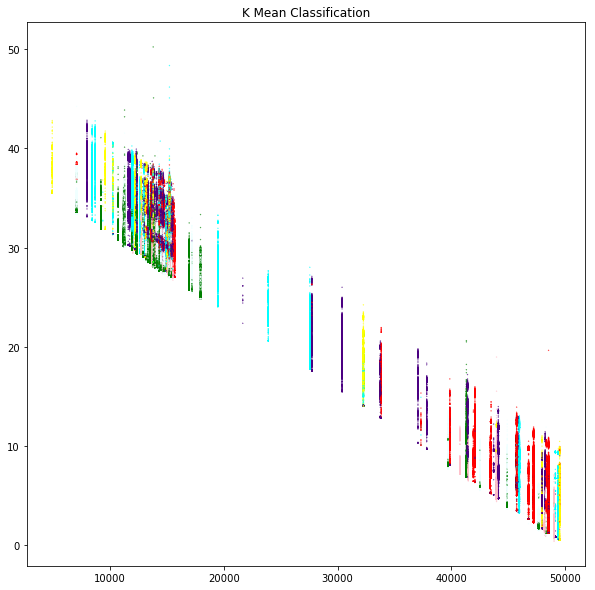

In [549]:
plt.figure(figsize=(22,10))
 
# Create a colormap
colormap = np.array(['yellow','lime','green','orange','red','pink','indigo','aqua','blue','azure'])
 
# Plot the Models Classifications
plt.subplot(1, 2,2)
plt.scatter(dfFilter.CityRank,dfCluster.HouseScore, c=colormap[KMeanmodel.labels_], s=0.1)
plt.title('K Mean Classification')
plt.show()

# Predictions

In [416]:
dftrain_2016 = pd.read_csv("train_2016_v2.csv",low_memory=False)

In [417]:
dftrain_2017 = pd.read_csv("train_2017.csv",low_memory=False)

In [418]:
dfCluster1 = pd.read_csv("Cluster_1.csv",low_memory=False)

In [419]:
dfCluster2 = pd.read_csv("Cluster_2.csv",low_memory=False)

In [409]:
rows_train,col_train = dftrain_2016.shape
print(rows_train,col_train)

90275 3


In [410]:
rows_train,col_train = dftrain_2017.shape
print(rows_train,col_train)

77613 3


In [420]:
dftrain_2016.columns

Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')

In [411]:
dfCluster1.columns

Index(['poolcnt', 'buildingqualitytypeid_7', 'buildingqualitytypeid_4',
       'buildingqualitytypeid_1', 'buildingqualitytypeid_10',
       'heatingorsystemtypeid_2', 'heatingorsystemtypeid_7',
       'heatingorsystemtypeid_6', 'heatingorsystemtypeid_24', 'roomcnt_zscore',
       'calculatedfinishedsquarefeet_zscore', 'garagetotalsqft_zscore',
       'taxvaluedollarcnt_zscore', 'CityRank_zscore', 'HouseScore',
       'parcelid'],
      dtype='object')

In [421]:
dftrain_2016 = dftrain_2016.set_index("parcelid")
dftrain_2017 = dftrain_2017.set_index("parcelid")
dfCluster1 = dfCluster1.set_index("parcelid")
dfCluster2 = dfCluster2.set_index("parcelid")

In [413]:
dfCluster2.columns

Index(['poolcnt', 'buildingqualitytypeid_6', 'buildingqualitytypeid_8',
       'buildingqualitytypeid_4', 'buildingqualitytypeid_7',
       'heatingorsystemtypeid_2', 'heatingorsystemtypeid_7',
       'heatingorsystemtypeid_6', 'heatingorsystemtypeid_24', 'roomcnt_zscore',
       'calculatedfinishedsquarefeet_zscore', 'garagetotalsqft_zscore',
       'taxvaluedollarcnt_zscore', 'CityRank_zscore', 'HouseScore'],
      dtype='object')

In [422]:
data_join_2016 = dftrain_2016.join(dfCluster1, lsuffix='_trainer', rsuffix='_original',how="left")
print(data_join_2016.shape)
data_join_2016.head(10)

(90275, 17)


,logerror,transactiondate,poolcnt,buildingqualitytypeid_7,buildingqualitytypeid_4,buildingqualitytypeid_1,buildingqualitytypeid_10,heatingorsystemtypeid_2,heatingorsystemtypeid_7,heatingorsystemtypeid_6,heatingorsystemtypeid_24,roomcnt_zscore,calculatedfinishedsquarefeet_zscore,garagetotalsqft_zscore,taxvaluedollarcnt_zscore,CityRank_zscore,HouseScore
parcelid,,,,,,,,,,,,,,,,,
10711738,0.0276,8/2/16,2.5,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.729167,0.053287,0.49525,0.020054,26.917459,34.715218
10711755,-0.0182,8/2/16,2.5,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.625000,0.033362,0.49525,0.016261,26.917459,34.587333
10711805,-0.1009,5/3/16,2.5,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.520833,0.050621,0.49525,0.013607,26.917459,34.497770
10711816,-0.0121,4/5/16,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.625000,0.046862,0.49525,0.015460,26.917459,32.100032
10711858,-0.0481,7/15/16,2.5,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.625000,0.039514,0.49525,0.013510,26.917459,34.590734
10711910,0.2897,8/30/16,2.5,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.520833,0.031011,0.49525,0.002718,26.917459,34.467271
10712086,0.0040,2/12/16,2.5,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.625000,0.038842,0.49525,0.013583,26.917459,34.590135
10712162,-0.0121,9/27/16,2.5,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.625000,0.067039,0.49525,0.024577,26.917459,34.629326
10712163,0.0139,8/23/16,2.5,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.729167,0.050831,0.49525,0.021864,26.917459,34.714571


In [423]:
data_join_2017 = dftrain_2017.join(dfCluster2, lsuffix='_trainer', rsuffix='_original',how="left")
print(data_join_2017.shape)
data_join_2017.head(10)

(77613, 17)


,logerror,transactiondate,poolcnt,buildingqualitytypeid_6,buildingqualitytypeid_8,buildingqualitytypeid_4,buildingqualitytypeid_7,heatingorsystemtypeid_2,heatingorsystemtypeid_7,heatingorsystemtypeid_6,heatingorsystemtypeid_24,roomcnt_zscore,calculatedfinishedsquarefeet_zscore,garagetotalsqft_zscore,taxvaluedollarcnt_zscore,CityRank_zscore,HouseScore
parcelid,,,,,,,,,,,,,,,,,
10711855,-0.007357,2017-07-07,2.5,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.520833,0.044238,0.494459,0.019527,26.917459,34.496517
10711877,0.021066,2017-08-29,2.5,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.625000,0.039514,0.494459,0.020649,26.917459,34.597082
10711888,0.077174,2017-04-04,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.625000,0.039514,0.494459,0.016986,26.917459,32.093419
10711910,-0.041238,2017-03-17,2.5,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.520833,0.031011,0.494459,0.002441,26.917459,34.466204
10711923,-0.009496,2017-03-24,2.5,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.625000,0.040270,0.494459,0.012998,26.917459,34.590186
10711945,0.001271,2017-01-30,2.5,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.520833,0.042642,0.494459,0.013279,26.917459,34.488672
10711956,0.023298,2017-07-03,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.625000,0.035231,0.494459,0.016438,26.917459,32.088587
10711995,0.041138,2017-03-09,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.625000,0.039514,0.494459,0.018146,26.917459,32.094578
10712005,0.012092,2017-08-01,2.5,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.520833,0.035882,0.494459,0.002908,26.917459,34.471541


In [424]:
data_join_2016.columns

Index(['logerror', 'transactiondate', 'poolcnt', 'buildingqualitytypeid_7',
       'buildingqualitytypeid_4', 'buildingqualitytypeid_1',
       'buildingqualitytypeid_10', 'heatingorsystemtypeid_2',
       'heatingorsystemtypeid_7', 'heatingorsystemtypeid_6',
       'heatingorsystemtypeid_24', 'roomcnt_zscore',
       'calculatedfinishedsquarefeet_zscore', 'garagetotalsqft_zscore',
       'taxvaluedollarcnt_zscore', 'CityRank_zscore', 'HouseScore'],
      dtype='object')

# Linear Regression

In [454]:
retainList = ['roomcnt_zscore','calculatedfinishedsquarefeet_zscore', 'garagetotalsqft_zscore',\
              'CityRank_zscore','HouseScore','heatingorsystemtypeid_2',
       'heatingorsystemtypeid_7', 'heatingorsystemtypeid_6',
       'heatingorsystemtypeid_24']

In [455]:
permuteList = ['buildingqualitytypeid_7', 'buildingqualitytypeid_4','buildingqualitytypeid_1',
               'buildingqualitytypeid_10','heatingorsystemtypeid_2', 'heatingorsystemtypeid_7',
               'heatingorsystemtypeid_6', 'heatingorsystemtypeid_24',
                'propertylandusetypeid_261', 'propertylandusetypeid_266',
               'propertylandusetypeid_246', 'propertylandusetypeid_269',
               'roomcnt_zscore', 'calculatedfinishedsquarefeet_zscore',
               'garagetotalsqft_zscore', 
                'lotsizesquarefeet_zscore','unitcnt_zscore','yearbuilt_zscore', 
               'taxvaluedollarcnt_zscore', 'CityRank_zscore']

In [471]:
y = data_join_2016['logerror']
X = data_join_2016.filter(retainList)
X.head(1)

,roomcnt_zscore,calculatedfinishedsquarefeet_zscore,garagetotalsqft_zscore,CityRank_zscore,HouseScore,heatingorsystemtypeid_2,heatingorsystemtypeid_7,heatingorsystemtypeid_6,heatingorsystemtypeid_24
parcelid,,,,,,,,,
10711738,0.729167,0.053287,0.49525,26.917459,34.715218,1.0,0.0,0.0,0.0


In [472]:
model_2016 = sm.OLS(y, X).fit()

In [473]:
retainList_2017 = ['roomcnt_zscore','calculatedfinishedsquarefeet_zscore', 'garagetotalsqft_zscore']

In [474]:
y = data_join_2017['logerror']
X = data_join_2017.filter(retainList_2017)
X.head(1)

,roomcnt_zscore,calculatedfinishedsquarefeet_zscore,garagetotalsqft_zscore
parcelid,,,
10711855,0.520833,0.044238,0.494459


In [475]:
model_2017 = sm.OLS(y, X).fit()

In [476]:
ds_feature_2016 = dfCluster1.filter(retainList) 

In [477]:
dfCluster1.columns

Index(['poolcnt', 'buildingqualitytypeid_7', 'buildingqualitytypeid_4',
       'buildingqualitytypeid_1', 'buildingqualitytypeid_10',
       'heatingorsystemtypeid_2', 'heatingorsystemtypeid_7',
       'heatingorsystemtypeid_6', 'heatingorsystemtypeid_24', 'roomcnt_zscore',
       'calculatedfinishedsquarefeet_zscore', 'garagetotalsqft_zscore',
       'taxvaluedollarcnt_zscore', 'CityRank_zscore', 'HouseScore'],
      dtype='object')

In [478]:
ds_feature_2017 = dfCluster2.filter(retainList_2017) 

In [479]:
# ds_feature = dfFilter.filter(lst) 
# ds_feature_2016.iloc[0]
ds_feature_2016.head(1)

,roomcnt_zscore,calculatedfinishedsquarefeet_zscore,garagetotalsqft_zscore,CityRank_zscore,HouseScore,heatingorsystemtypeid_2,heatingorsystemtypeid_7,heatingorsystemtypeid_6,heatingorsystemtypeid_24
parcelid,,,,,,,,,
10754147,0.0,0.0,0.49525,28.03565,28.530901,0.0,0.0,0.0,0.0


In [480]:
pred_y_2016 = model_2016.predict(ds_feature_2016)
pred_df_2016 = pd.DataFrame(pred_y_2016)

pred_df_2016 = pred_df_2016.rename(columns={0: '201610'})
pred_df_2016["201611"] = pred_df_2016["201610"]
pred_df_2016["201612"] = pred_df_2016["201610"]


In [481]:
pred_df_2016.head(10)

,201610,201611,201612
parcelid,,,
10754147,-0.002135,-0.002135,-0.002135
10759547,-0.002137,-0.002137,-0.002137
10843547,0.535565,0.535565,0.535565
10859147,0.031108,0.031108,0.031108
10879947,0.010951,0.010951,0.010951
10898347,0.011540,0.011540,0.011540
10933547,-0.002141,-0.002141,-0.002141
10940747,0.025551,0.025551,0.025551
10954547,-0.000980,-0.000980,-0.000980


In [482]:
pred_y_2017 = model_2017.predict(ds_feature_2017)
pred_df_2017 = pd.DataFrame(pred_y_2017)

In [483]:
pred_df_2017 = pred_df_2017.rename(columns={0: '201710'})
pred_df_2017["201711"] = pred_df_2017["201710"]
pred_df_2017["201712"] = pred_df_2017["201710"]
print(pred_df_2017.head(10))
print(pred_df_2017.shape)

            201710    201711    201712
parcelid                              
10754147  0.002895  0.002895  0.002895
10759547  0.002895  0.002895  0.002895
10843547  0.403848  0.403848  0.403848
10859147  0.030721  0.030721  0.030721
10879947  0.012646  0.012646  0.012646
10898347  0.016073  0.016073  0.016073
10933547  0.002895  0.002895  0.002895
10940747  0.022722  0.022722  0.022722
10954547  0.002895  0.002895  0.002895
10976347  0.023507  0.023507  0.023507
(2985217, 3)


In [484]:
pred_df_2016['201710'] = pred_df_2017['201710']
pred_df_2016['201711'] = pred_df_2017['201711']
pred_df_2016['201712'] = pred_df_2017['201712']
print(pred_df_2016.head(10))pred_df_2016.shape

            201610    201611    201612    201710    201711    201712
parcelid                                                            
10754147 -0.002135 -0.002135 -0.002135  0.002895  0.002895  0.002895
10759547 -0.002137 -0.002137 -0.002137  0.002895  0.002895  0.002895
10843547  0.535565  0.535565  0.535565  0.403848  0.403848  0.403848
10859147  0.031108  0.031108  0.031108  0.030721  0.030721  0.030721
10879947  0.010951  0.010951  0.010951  0.012646  0.012646  0.012646
10898347  0.011540  0.011540  0.011540  0.016073  0.016073  0.016073
10933547 -0.002141 -0.002141 -0.002141  0.002895  0.002895  0.002895
10940747  0.025551  0.025551  0.025551  0.022722  0.022722  0.022722
10954547 -0.000980 -0.000980 -0.000980  0.002895  0.002895  0.002895
10976347  0.021511  0.021511  0.021511  0.023507  0.023507  0.023507


In [485]:
pred_df_2016.shape

(2985217, 6)

In [ ]:
pred_df_2016.to_csv("Dracarys7.csv")

# Decision Tree Regressor

In [486]:
retainList = ['roomcnt_zscore','calculatedfinishedsquarefeet_zscore', 'garagetotalsqft_zscore']

In [487]:
from sklearn import tree
from sklearn.model_selection import train_test_split
regress_type = tree.DecisionTreeRegressor(random_state=10)
d1 = data_join_2016.filter(retainList)
c1 = data_join_2016.filter(["logerror"])
(x_train_data,x_test_data,y_train_data,y_test_data) = train_test_split(d1,c1,test_size=0.20,random_state=10)
regress_type.fit(x_train_data,y_train_data)
pred_y = regress_type.predict(x_test_data)
cc = pd.DataFrame(pred_y)
cc = cc.rename(columns={0: 'logerror'})

print("Mean Absolute Error is :"  '%s'% mean_absolute_error(y_test_data,cc))
y_test_data.head(10)

Mean Absolute Error is :0.0917787776448


,logerror
parcelid,
12551240,-0.0274
17226315,0.0159
12130006,-0.0377
12214700,-0.0471
17295403,-0.0161
14323936,-0.0790
12200489,0.2639
11307169,0.0139
17292809,-0.0212


In [488]:
df_Permute = pd.read_csv("Filtered_Data.csv",low_memory=False)

# Permutation Test

In [489]:
df_Permute = df_Permute.set_index("parcelid")

In [490]:
data_permute = dftrain_2016.join(df_Permute, lsuffix='_trainer', rsuffix='_original',how="left")
print(data_permute.shape)
data_permute.head(10)

(90275, 34)


,logerror,transactiondate,regionidcity,regionidzip,roomcnt,calculatedfinishedsquarefeet,garagetotalsqft,lotsizesquarefeet,poolcnt,unitcnt,...,propertylandusetypeid_269,roomcnt_zscore,calculatedfinishedsquarefeet_zscore,garagetotalsqft_zscore,lotsizesquarefeet_zscore,unitcnt_zscore,yearbuilt_zscore,taxvaluedollarcnt_zscore,CityRank_zscore,HouseScore
parcelid,,,,,,,,,,,,,,,,,,,,,
10711738,0.0276,8/2/16,Los Angeles,96339.0,7.0,2538.0,383.15622,11012.0,1.0,1.0,...,0,0.072917,0.002664,0.049446,0.000029,0.0,0.823256,0.001801,0.23093,34.712386
10711755,-0.0182,8/2/16,Los Angeles,96339.0,6.0,1589.0,383.15622,11010.0,1.0,1.0,...,0,0.062500,0.001668,0.049446,0.000029,0.0,0.734884,0.001731,0.23093,34.587589
10711805,-0.1009,5/3/16,Los Angeles,96339.0,5.0,2411.0,383.15622,11723.0,1.0,1.0,...,0,0.052083,0.002531,0.049446,0.000031,0.0,0.800000,0.001222,0.23093,34.495595
10711816,-0.0121,4/5/16,Los Angeles,96339.0,6.0,2232.0,383.15622,9002.0,0.0,1.0,...,0,0.062500,0.002343,0.049446,0.000024,0.0,0.800000,0.001389,0.23093,32.097667
10711858,-0.0481,7/15/16,Los Angeles,96339.0,6.0,1882.0,383.15622,9002.0,1.0,1.0,...,0,0.062500,0.001976,0.049446,0.000024,0.0,0.800000,0.001214,0.23093,34.588568
10711910,0.2897,8/30/16,Los Angeles,96339.0,5.0,1477.0,383.15622,11285.0,1.0,1.0,...,0,0.052083,0.001551,0.049446,0.000030,0.0,0.739535,0.000244,0.23093,34.466204
10712086,0.0040,2/12/16,Los Angeles,96339.0,6.0,1850.0,383.15622,9089.0,1.0,1.0,...,0,0.062500,0.001942,0.049446,0.000024,0.0,0.804651,0.001210,0.23093,34.587859
10712162,-0.0121,9/27/16,Los Angeles,96339.0,6.0,3193.0,383.15622,15577.0,1.0,1.0,...,0,0.062500,0.003352,0.049446,0.000042,0.0,0.758140,0.002481,0.23093,32.628768
10712163,0.0139,8/23/16,Los Angeles,96339.0,7.0,2421.0,383.15622,10584.0,1.0,1.0,...,0,0.072917,0.002542,0.049446,0.000028,0.0,0.748837,0.001964,0.23093,32.711555


In [491]:
permuteList = ['roomcnt','buildingqualitytypeid_7', 'buildingqualitytypeid_4','heatingorsystemtypeid_2', 'heatingorsystemtypeid_7',
               'heatingorsystemtypeid_6', 'heatingorsystemtypeid_24',
               'propertylandusetypeid_261', 'propertylandusetypeid_266',
               'propertylandusetypeid_246', 'propertylandusetypeid_269',
               'roomcnt_zscore', 'calculatedfinishedsquarefeet_zscore',
               'garagetotalsqft_zscore', 'lotsizesquarefeet_zscore',
               'unitcnt_zscore','yearbuilt_zscore', 'taxvaluedollarcnt_zscore', 'CityRank_zscore']

### We divided the dataset into train/test ratio of .8/.2

In [492]:
msk = np.random.rand(len(data_permute)) < 0.8

train = data_permute[msk]

test = data_permute[~msk]

In [494]:
x = train[permuteList]
y = train["logerror"]
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

### This is the mean squared error of actual predictions done by our model

In [495]:
testx = test[permuteList]
truey = test["logerror"]

predicty = model.predict(testx)
mse = mean_squared_error(truey, predicty)
print("Mean Squared Error :",mse)

Mean Squared Error : 0.0239287149321


### We permuted the logerrors 500 times and then calculated the average mean squared error.

In [496]:
permute_error_list = list()
for i in range(500):
    dfshuffle = np.random.permutation(test.logerror)
    mse = mean_squared_error(predicty, dfshuffle)
    permute_error_list.append(mse)
print("Average Mean Squared Error :",np.mean(permute_error_list))

Average Mean Squared Error : 0.0479941742129


### The difference between mean squared error of non-permuted data and average mean squared error of permuted data is pretty much noticeable.

# Finish